<a href="https://colab.research.google.com/github/taejoonlab/BME603-Proteomics/blob/main/ms1ms2/Count-MS1MS2-Python3.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

# Explore MS1 and MS2 data of mass spec proteomics

## Download data files (ms1 & ms2)

"curl" is a program you can download a file using its URL. If you want to know more about this program, run "!curl --manual" in the code block.
You can get more information about MS1 and MS2 format in the below:
- https://doi.org/10.1002/rcm.1603
- http://crux.ms/file-formats/ms2-format.html

In [6]:
!curl -O https://pub.taejoonlab.org/BME603/ABRF_iPRG2009/ms1ms2/iPRG2009_ECOLI_blue_1.ms1.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  284M  100  284M    0     0  3326k      0  0:01:27  0:01:27 --:--:-- 3155k:46  0:00:38 3710k 3529k      0  0:01:22  0:01:04  0:00:18 2974k


In [12]:
!curl -O https://pub.taejoonlab.org/BME603/ABRF_iPRG2009/ms1ms2/iPRG2009_ECOLI_blue_1.ms2.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.2M  100 15.2M    0     0  6453k      0  0:00:02  0:00:02 --:--:-- 6453k


In [14]:
!ls

Count-MS1MS2-Python3.ipynb    iPRG2009_ECOLI_blue_1.ms2.gz
iPRG2009_ECOLI_blue_1.ms1.gz


In [13]:
!zcat iPRG2009_ECOLI_blue_1.ms1.gz | head

H	CreationDate Wed Mar 17 17:23:50 2021
H	Extractor	ProteoWizard
H	Extractor version	Xcalibur software
H	Source file	iPRG2009_ECOLI_blue_1.raw
S	1	1
I	RTime	15.00152
I	BPI	9983.659
I	BPM	445.1206
I	TIC	87172.62
300.0008 0

gzip: stdout: Broken pipe


In [15]:
!zcat iPRG2009_ECOLI_blue_1.ms2.gz | head

H	CreationDate Wed Mar 17 17:14:09 2021
H	Extractor	ProteoWizard
H	Extractor version	Xcalibur software
H	Source file	iPRG2009_ECOLI_blue_1.raw
S	37	37	0
I	RTime	15.95345
I	BPI	338.4679
I	BPM	290.7694
I	TIC	741.0925
Z	3	925.6723

gzip: stdout: Broken pipe


## Count ms1 and ms2 spectra
- Read MS1 file: "iPRG2009_ECOLI_blue_1.ms1.gz"
- Read MS2 file: "iPRG2009_ECOLI_blue_1.ms2.gz"
- Count number of spectra, and their retention times.

In [36]:
import gzip

ret_times_ms1 = dict()
f_ms1 = gzip.open("iPRG2009_ECOLI_blue_1.ms1.gz", "rt")
for line in f_ms1:
    tokens = line.strip().split("\t")
    if tokens[0] == 'S':
        spectrum_id = line.strip().split()[1]
        if spectrum_id not in ret_times:
            ret_times_ms1[spectrum_id] = 0
    elif tokens[0] == 'I' and tokens[1] == 'RTime':
        tmp_ret_time = float(tokens[2])
        ret_times_ms1[spectrum_id] = tmp_ret_time
f_ms1.close()

print("Number of MS1 spectrum:", len(ret_times))

Number of MS1 spectrum: 6894


In [37]:
import gzip

ret_times_ms2 = dict()
f_ms2 = gzip.open("iPRG2009_ECOLI_blue_1.ms2.gz", "rt")
for line in f_ms2:
    tokens = line.strip().split("\t")
    if tokens[0] == 'S':
        spectrum_id = line.strip().split()[1]
        if spectrum_id not in ret_times:
            ret_times_ms2[spectrum_id] = 0
    elif tokens[0] == 'I' and tokens[1] == 'RTime':
        tmp_ret_time = float(tokens[2])
        ret_times_ms2[spectrum_id] = tmp_ret_time
f_ms1.close()

print("Number of MS2 spectrum:", len(ret_times_ms2))

Number of MS2 spectrum: 9354


You also can count it with the linux program "grep" and "wc". First column of outcome will be "the number of lines starting with 'S'".

In [16]:
!zcat iPRG2009_ECOLI_blue_1.ms1.gz | grep ^S | wc

   6894   20682   89790


In [17]:
!zcat iPRG2009_ECOLI_blue_1.ms2.gz | grep ^S | wc

   9354   37416  134178


## Distribution of Retention Times of ms1 & ms2 spectra
- Check the intervals of ret_times.
- Make a plot of the distribution.

MS1 retention time, start (min)): 15.00152
MS1 retention time, end (min): 183.9917
MS1 mean interval time: 1.471 secs
MS1 median interval time: 1.362 secs


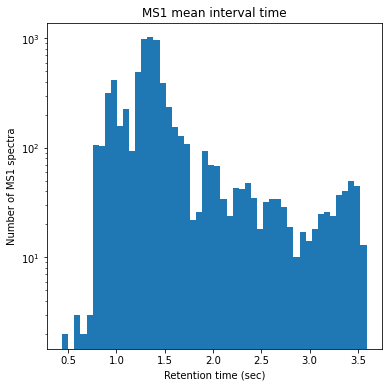

In [47]:
import statistics as stat

list_interval = []
prev_time = 0.0
for tmp_time in sorted(ret_times_ms1.values()):
    if prev_time == 0:
        prev_time = tmp_time
        continue
    else:
        interval_time = tmp_time - prev_time
        # convert minutes to seconds
        list_interval.append(interval_time * 60)
        prev_time = tmp_time

print("MS1 retention time, start (min)):", min(ret_times_ms1.values()))
print("MS1 retention time, end (min):", max(ret_times_ms1.values()))
print("MS1 mean interval time: %.3f secs" % (stat.mean(list_interval)))
print("MS1 median interval time: %.3f secs" % (stat.median(list_interval)))
      
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(list_interval, bins=50, log=True)
ax1.set_xlabel('Retention time (sec)')
ax1.set_ylabel('Number of MS1 spectra')
ax1.set_title('MS1 mean interval time')
plt.show()

MS2 retention time, start (min)): 15.95345
MS2 retention time, end (min): 183.695
MS2 mean interval time: 1.076 secs
MS2 median interval time: 0.360 secs


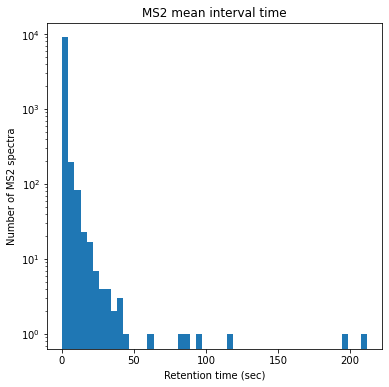

In [48]:
list_interval = []
prev_time = 0.0
for tmp_time in sorted(ret_times_ms2.values()):
    if prev_time == 0:
        prev_time = tmp_time
        continue
    else:
        interval_time = tmp_time - prev_time
        # convert minutes to seconds
        list_interval.append(interval_time * 60)
        prev_time = tmp_time

print("MS2 retention time, start (min)):", min(ret_times_ms2.values()))
print("MS2 retention time, end (min):", max(ret_times_ms2.values()))
print("MS2 mean interval time: %.3f secs" % (stat.mean(list_interval)))
print("MS2 median interval time: %.3f secs" % (stat.median(list_interval)))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(list_interval, bins=50, log=True)
ax1.set_xlabel('Retention time (sec)')
ax1.set_ylabel('Number of MS2 spectra')
ax1.set_title('MS2 mean interval time')
plt.show()